# CIS 443-01 - Analytics Programming
## Program 4
__Worth__: 100 pts.<br />
__Purpose__: Use a SKLearn to build an analytic model for categorical data

### Directions
In the code cell below, write Python code to accomplish the following using what you've learned through the semester. 


#### Part 1

Your code should use the preloaded data set to build a logistic regression model. Perform a training and testing split of this data before you create this model./ 

Once you have created this model, obtain all coefficients created by the model. 

Explain each of the two sets of coefficients, and what they mean. 

Score your model against the testing dataset, and explain when the score returned represents. 

In [7]:
#Provided Code
import pandas as pd

add_df = pd.read_csv('social_ads.csv')

x_data = add_df[['Age','EstimatedSalary']].values.reshape(-1, 2)
y_target = add_df.Purchased.values

In [101]:
# Put Program 4 Code Here. Do not create any additional code blocks or points may be deducted. 
# Program 4
# CIS 443-01
#By: Helen Le
#Due Date: 4/26/2025
#This program uses a csv file and logistic regression to use Age and Estimated Salary as predictors for a consumer's purchase decision.
#The coefficients of the predictors are interpreted, in addition to an accuracy score.
#A confusion matrix is then made to graph the predicted and expected values and their accuracy in a TP/TN/FP/FN matrix.


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

#Train and Test Model
x_train, x_test, y_train, y_test = train_test_split(x_data, y_target, random_state=11)

#Use logistic regression since data consists of yes and no
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

print(f'Coefficients: {logreg.coef_}')

print()
print('INTERPRETATION')
print('''The logistic regression model uses Age and Estimated Salary to predict a consumer's purchase decision (yes or no). 
The coefficient for age is approximately 0.235, meaning that as a consumer increases a year in age and gets older, 
the log-odds of making a purchase increase. Simply, older consumers are more likely to buy a product, 
so for each additional year of age, the odds of purchasing increase by about 26.5%.''')
print()
print('''The coefficient for Estimated Salary is approximately 0.000037, meaning that salary has a smaller impact
on the likelihood of purchasing, in comparison to age. For a $1,000 increase in salary,
the odds of purchasing increase by 3.8%.''')
print()
print('''In summary, Age is a stronger predictor for purchasing habits on the social media website
than Salary.''')
print()

score = logreg.score(x_test, y_test)
print(f'Score: {score}')
print(f'This model correctly predicts the purchase decision {score * 100}% of the time.')


Coefficients: [[2.35123397e-01 3.74715887e-05]]

INTERPRETATION
The logistic regression model uses Age and Estimated Salary to predict a consumer's purchase decision (yes or no). 
The coefficient for age is approximately 0.235, meaning that as a consumer increases a year in age and gets older, 
the log-odds of making a purchase increase. Simply, older consumers are more likely to buy a product, 
so for each additional year of age, the odds of purchasing increase by about 26.5%.

The coefficient for Estimated Salary is approximately 0.000037, meaning that salary has a smaller impact
on the likelihood of purchasing, in comparison to age. For a $1,000 increase in salary,
the odds of purchasing increase by 3.8%.

In summary, Age is a stronger predictor for purchasing habits on the social media website
than Salary.

Score: 0.83
This model correctly predicts the purchase decision 83.0% of the time.


#### Part 2

Use pandas and Matplotlib to create a confusion matrix of the scoring of your model. Because this is a Yes/No Questionaire, you can consider it a TP/TN/FP/FN matrix.



The model accurately predicted No when the actual answer was No 63 times.
The model incorrectly predicted Yes when the actual answer was No 3 times.
The model inaccurately predicted No when the actual answer was Yes 14 times.
The model accurately predicted Yes when the actual answer was Yes 20 times.


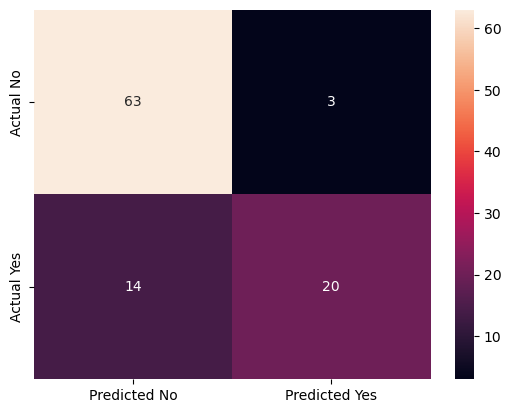

In [103]:
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sns

#Form and graph confusion matrix
y_pred = logreg.predict(x_test)
confmatrix = confusion_matrix(y_test, y_pred)
confusion_matrix_df = pd.DataFrame(confmatrix, index=['Actual No', 'Actual Yes'], columns=['Predicted No', 'Predicted Yes'])
sns.heatmap(confusion_matrix_df, annot=True)

#Print out interpretations of matrix using TP/TN/FP/FN
TN, FP, FN, TP = confmatrix.ravel()

print(f'The model accurately predicted No when the actual answer was No {TN} times.')
print(f'The model incorrectly predicted Yes when the actual answer was No {FP} times.')
print(f'The model inaccurately predicted No when the actual answer was Yes {FN} times.')
print(f'The model accurately predicted Yes when the actual answer was Yes {TP} times.')

Be sure to save and exit your Jupyter Notebook and Shutdown Jupyter Lab (from the __File__ menu) before you submit your notebook on Blackboard for grading.